# Compare CMIP5 zos fields computed from AR5 and from Python

### Now read the AR5 data

In [222]:
sce='rcp85'
sce_name = {'rcp45':'ZOSH45' ,'rcp85':'ZOS85'}
string_length = {'rcp45': 17, 'rcp85':16}

files = os.listdir(f'{ar5_data_dir}{sce_name[sce]}')
MOD = []
for i in range(len(files)):
    #MOD.append(files[i][:-string_length[sce]])
    MOD.append(files[i][:-16])
MOD.sort()
print(MOD)

odyn_ar5_df = pd.DataFrame(dict(time=np.arange(1950,2101)))
odyn_ar5_df = odyn_ar5_df.set_index('time')
for mod in MOD:
    file_name = f'{ar5_data_dir}{sce_name[sce]}/{mod}_lonlat_{sce_name[sce]}.nc'
    with xr.open_dataset(file_name) as ds:
        ds = loc.rotate_longitude(ds)
        ds = ds.sel(longitude=slice(lon_min,lon_max), latitude=slice(lat_min,lat_max))
        odyn_sce = ds[sce_name[sce]].mean(dim=['longitude','latitude'])
    df = odyn_sce.to_dataframe()
    df.index = np.floor(df.index/10000)
    odyn_ar5_df[mod] = df
odyn_ar5_df['mean'] = odyn_ar5_df.mean(axis=1)
odyn_ar5_df.iloc[-10:]

['CSIRO-Mk3-6-0', 'CanESM2', 'GFDL-ESM2M', 'GISS-E2-R', 'HadGEM2-CC', 'IPSL-CM5A-MR', 'MIROC-ESM', 'MIROC5', 'MPI-ESM-LR', 'NorESM1-M', 'inmcm4']


,CSIRO-Mk3-6-0,CanESM2,GFDL-ESM2M,GISS-E2-R,HadGEM2-CC,IPSL-CM5A-MR,MIROC-ESM,MIROC5,MPI-ESM-LR,NorESM1-M,inmcm4,mean
time,,,,,,,,,,,,
2091,-0.215640,0.365819,-0.038114,-0.136604,0.023339,0.165287,0.311058,0.112354,0.106106,-0.171571,0.033820,0.050532
2092,-0.141545,0.377456,-0.075979,-0.170672,0.062059,0.157160,0.330655,0.134592,0.048009,-0.198530,0.003857,0.047915
2093,-0.093020,0.398607,-0.046177,-0.149165,0.097382,0.153830,0.336673,0.132110,0.120790,-0.197127,-0.033747,0.065469
2094,-0.176062,0.423270,-0.073797,-0.135445,0.136049,0.160988,0.342621,0.122731,0.133118,-0.176403,0.034165,0.071931
2095,-0.188894,0.418761,-0.066320,-0.154509,0.068076,0.148970,0.354937,0.160181,0.109427,-0.209684,0.058156,0.063555
2096,-0.198452,0.380967,-0.029922,-0.174934,0.089661,0.202510,0.345001,0.156031,0.107441,-0.176325,0.028267,0.066386
2097,-0.172956,0.406328,-0.034580,-0.115639,0.123597,0.192857,0.334983,0.162243,0.141586,-0.166669,0.003692,0.079586
2098,-0.185151,0.424462,-0.022186,-0.150289,0.133152,0.218204,0.371178,0.181539,0.163829,-0.177913,0.012655,0.088135
2099,-0.207595,0.422776,-0.007953,-0.077804,0.139717,0.178456,0.368442,0.223967,0.171007,-0.190196,-0.005344,0.092316


<AxesSubplot:xlabel='time'>

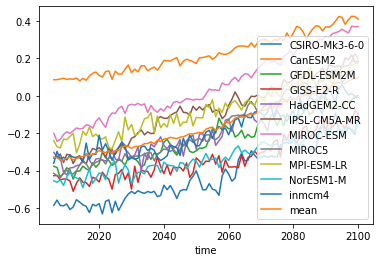

In [223]:
odyn_ar5_df.plot()

The reference period (1986-2005) was not removed.

How was it done in KNMI'14?

And also these files include the global steric term.


Useful data source for further comparison:

AR5 data from Mark Carson (https://icdc.cen.uni-hamburg.de/en/ar5-slr.html)

Unfortunately does not provide data per model. But that can be used to compare Python code with AR5.